# Import Libraries & Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('creditcard.csv')

# Logistic Regression (LR)

d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.70      0.62      0.66        87

    accuracy                           1.00     56962
   macro avg       0.85      0.81      0.83     56962
weighted avg       1.00      1.00      1.00     56962



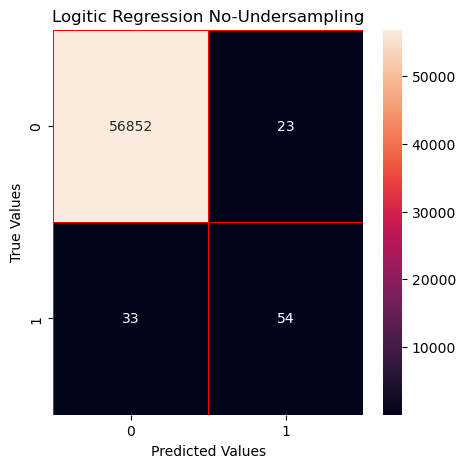

Evaluation Metrics:
Accuracy: 0.9990168884519505
Precision: 0.7012987012987013
Recall: 0.6206896551724138
F1 Score: 0.6585365853658537


In [3]:
def validate_logistic_regression_model(data, Class):
    """
    Function to perform model validation using logistic regression.
 
    Parameters:
    - data: pandas DataFrame
        The input data for training and testing the model.
    - target: str
        The name of the target variable column in the data.
 
    Returns:
    - dict:
        A dictionary containing the evaluation metrics of the logistic regression model.
 
    Raises:
    - ValueError:
        Raises an error if the target variable column is not present in the data.
    """
 
    # Checking if the target variable column is present in the data
    if Class not in data.columns:
        raise ValueError("Target variable column not found in the data.")
 
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data.drop(Class, axis=1),
                                                         data[Class], test_size=0.2, random_state=1)
 
    # Initializing the logistic regression model
    model = LogisticRegression()
 
    # Training the model
    model.fit(X_train, y_train)
 
    # Making predictions on the test set
    y_pred = model.predict(X_test)
 
    # Calculating evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
 
    # Creating a dictionary of evaluation metrics
    evaluation_metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    #Confusion Matrix
    y_pred = model.predict(X_test)
    conf_mat = confusion_matrix(y_test,y_pred)

    print(classification_report(y_test, y_pred))

    #Visualization Of The Confusion Matrix
    f, ax = plt.subplots(figsize=(5,5))
    sea.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.title("Logitic Regression No-Undersampling")
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    plt.show()

    return evaluation_metrics
 
# Example usage of the validate_logistic_regression_model function:
 
# Load the data
data = pd.read_csv('creditcard.csv')
 
# Specify the target variable column
Class = 'Class'
 
# Perform model validation using logistic regression
metrics = validate_logistic_regression_model(data, Class)
 
# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy: {metrics['accuracy']}")
print(f"Precision: {metrics['precision']}")
print(f"Recall: {metrics['recall']}")
print(f"F1 Score: {metrics['f1']}")


# Decision Trees (DT)

Accuracy: 0.9992099996488887
Precision: 0.7386363636363636
Recall: 0.7471264367816092
F1 Score: 0.7428571428571429
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.74      0.75      0.74        87

    accuracy                           1.00     56962
   macro avg       0.87      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962



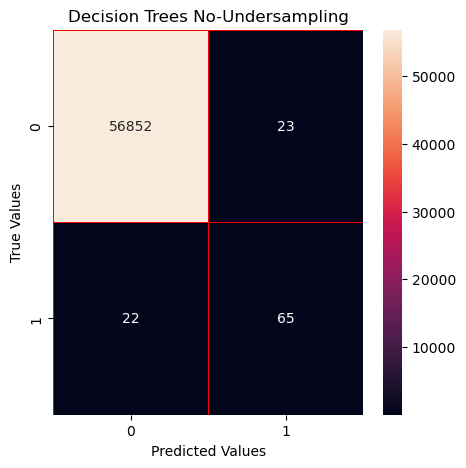

In [4]:
df = pd.read_csv('creditcard.csv')

X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

DecTreeClass = DecisionTreeClassifier()

# Train Decision Tree Classifer
DecTreeClass = DecTreeClass.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = DecTreeClass.predict(X_test)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

#Confusion Matrix
y_pred = DecTreeClass.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization Of The Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sea.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title("Decision Trees No-Undersampling")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# K-Nearest Neighbors (KNN)

Accuracy: 0.9995259997893332
Precision: 0.9285714285714286
Recall: 0.7471264367816092
f1: 0.8280254777070064
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.93      0.75      0.83        87

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



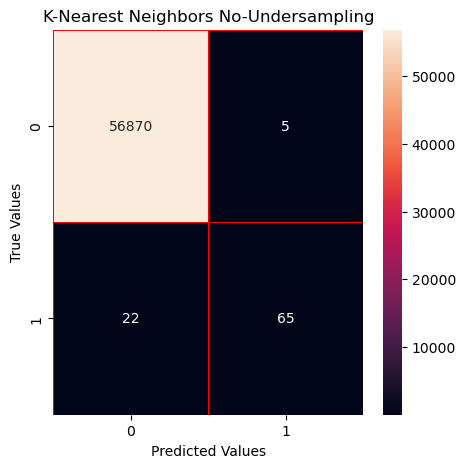

In [5]:
# https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

df = pd.read_csv('creditcard.csv')

# Split the data into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1:", f1)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

#Confusion Matrix
y_pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization Of The Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sea.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title("K-Nearest Neighbors No-Undersampling")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

## KNN tuning

Accuracy: 0.9994733330992591
Precision: 0.9014084507042254
Recall: 0.735632183908046
f1: 0.810126582278481


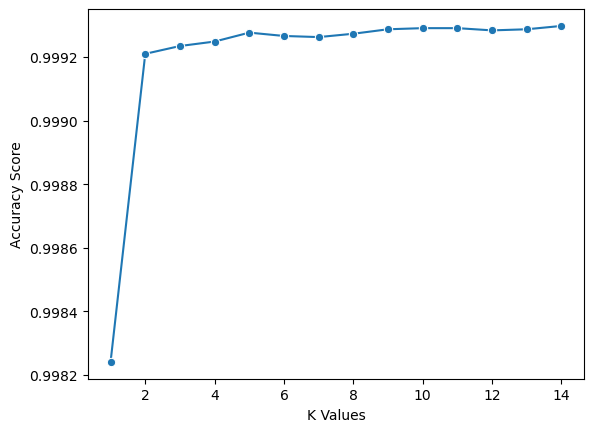

In [6]:
# cross validation to get best value of k---------

#k_values = [i for i in range (1,16)]
#scores = []

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

#for k in k_values:
#    knn = KNeighborsClassifier(n_neighbors = k)
#    score = cross_val_score(knn, X, y, cv=5)
#    scores.append(np.mean(score))

#sea.lineplot(x = k_values, y = scores, marker = 'o')
#plt.xlabel("K Values")
#plt.ylabel("Accuracy Score")

# cros valid end -------------------------------

# metrics begin
#best_index = np.argmax(scores)
#best_k = k_values[best_index]

#knn = KNeighborsClassifier(n_neighbors=best_k)
#knn.fit(X_train, y_train)

#y_pred = knn.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
#f1 = f1_score(y_test, y_pred)

#print("Accuracy:", accuracy)
#print("Precision:", precision)
#print("Recall:", recall)
#print("f1:", f1)

# Guassian Naive Bayes (NB)

Accuracy:  0.9932762192338752
Precision:  0.6091954022988506
Recall:  0.1318407960199005
F1 Score: 0.9911199200275481
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56875
           1       0.13      0.61      0.22        87

    accuracy                           0.99     56962
   macro avg       0.57      0.80      0.61     56962
weighted avg       1.00      0.99      1.00     56962



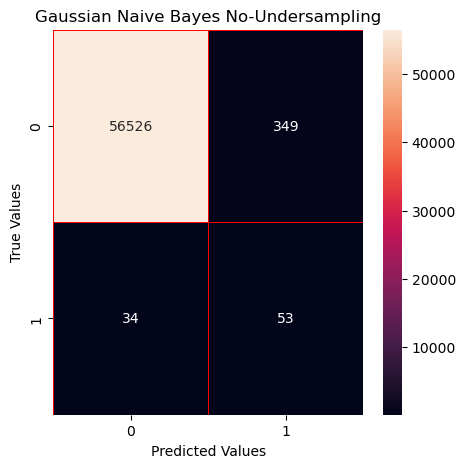

In [6]:
#https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
df = pd.read_csv('creditcard.csv')

# Split the data into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# model evaluation

from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    confusion_matrix,
    recall_score,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy: ", accuray)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score:", f1)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

#Confusion Matrix
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization Of The Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sea.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title("Gaussian Naive Bayes No-Undersampling")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# Support Vector Machines (SVM)

Accuracy: 0.9987711105649381
Precision: 0.717948717948718
Recall: 0.3218390804597701
f1: 0.4444444444444445
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.72      0.32      0.44        87

    accuracy                           1.00     56962
   macro avg       0.86      0.66      0.72     56962
weighted avg       1.00      1.00      1.00     56962



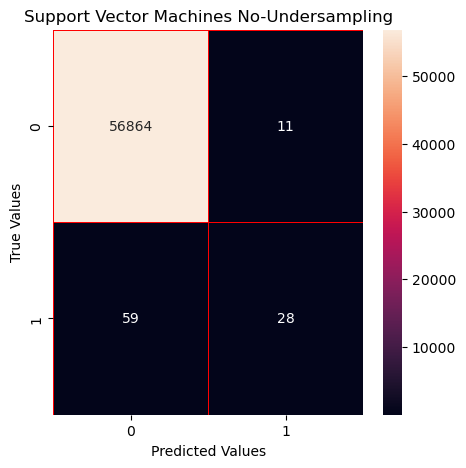

In [7]:
# https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
df = pd.read_csv('creditcard.csv')

X = df.drop(['Class'], axis=1)
y = df['Class']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) # 70% training and 30% test

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

print("f1:", metrics.f1_score(y_test, y_pred))

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

#Confusion Matrix
y_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization Of The Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sea.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title("Support Vector Machines No-Undersampling")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# Random Forest

Accuracy: 0.9995611109160493
Precision: 0.9305555555555556
Recall: 0.7701149425287356
f1: 0.8427672955974842
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.93      0.77      0.84        87

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



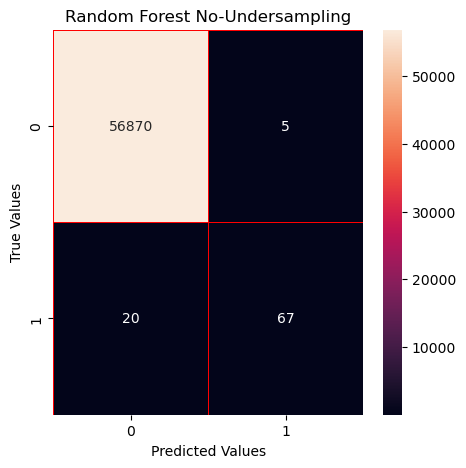

In [8]:
df = pd.read_csv('creditcard.csv')

X = df.drop(['Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1:", f1)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

#Confusion Matrix
y_pred = rfc.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization Of The Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sea.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title("Random Forest No-Undersampling")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()